In [1]:
import CSV
using PyPlot

import GeometricTools
gt = GeometricTools

include("../src/WFVisual.jl")
wfv = WFVisual

module_path = splitdir(@__FILE__)[1]            # Path to this notebook
data_path = joinpath(module_path, "../data/")   # Path to data files
save_path = joinpath(module_path, "../temps/")  # Output path

"../temps/"

# Blade Geometry Description

The following lines read the airfoil geometry as found in the data files:

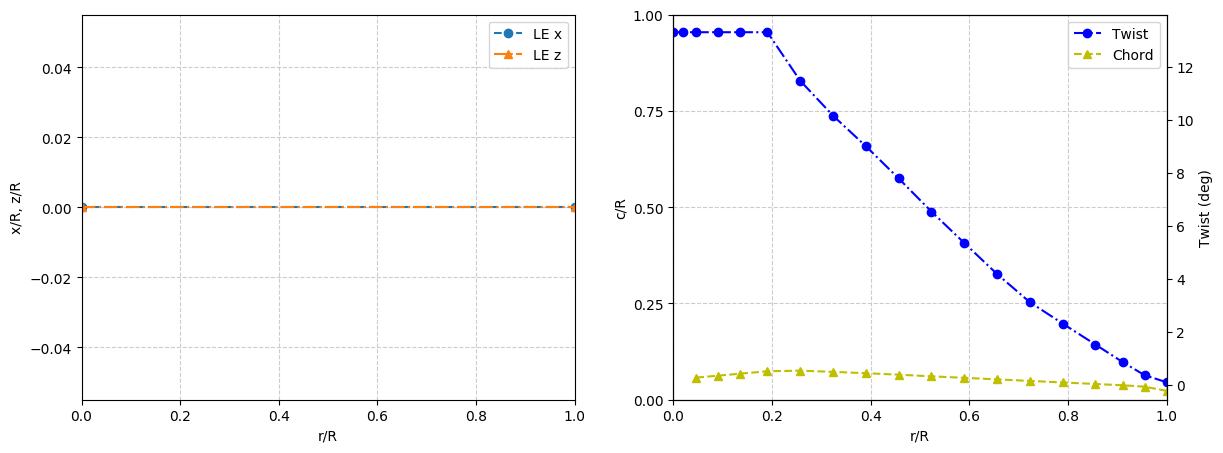

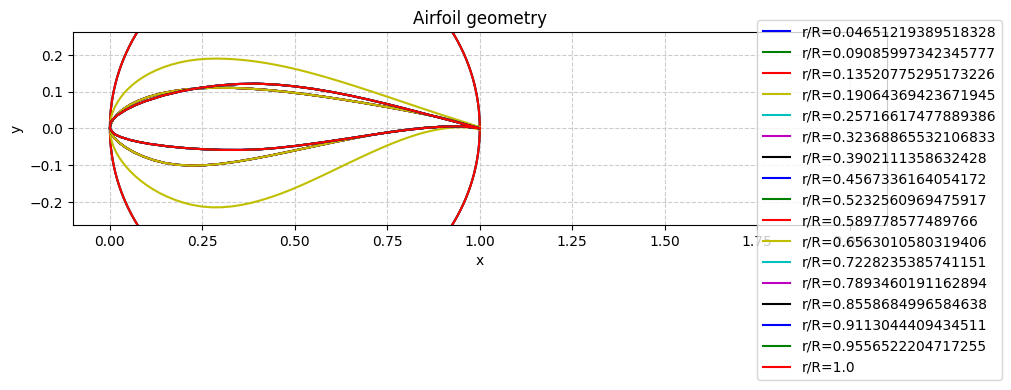

In [2]:
# ------------ BLADE PARAMETERS -----------------------------------------
blade_name = "NREL5MW"          # Blade identifier

# ------------ DATA -----------------------------------------------------
# Reads geometry from data files
data_airfoil = CSV.read(joinpath(data_path, blade_name*"_airfoilsections.csv"))
data_chord = CSV.read(joinpath(data_path, blade_name*"_chord.csv"))
data_twist = CSV.read(joinpath(data_path, blade_name*"_twist.csv"))
data_lex = CSV.read(joinpath(data_path, blade_name*"_lex.csv"))
data_lez = CSV.read(joinpath(data_path, blade_name*"_lez.csv"))

# Plots data
fig = figure(figsize=(7*2,5*1))

# LE x and z
subplot(121)
plot(data_lex[1], data_lex[2], "--o", label="LE x")
plot(data_lez[1], data_lez[2], "-.^", label="LE z")
xlim([0,1])
xlabel("r/R")
ylabel("x/R, z/R")
PyPlot.grid(true, color="0.8", linestyle="--")
legend(loc="best")

# Chord and twist
subplot(122)
p1 = plot(data_chord[1], data_chord[2], "--^y", label="Chord")
ylabel("c/R")
ylim([0, 1])
yticks(collect(0:0.25:1))

PyPlot.grid(true, color="0.8", linestyle="--")
xlabel("r/R")

twinx()
p2 = plot(data_twist[1], data_twist[2], "-.ob", label="Twist")

ylabel("Twist (deg)")
xlim([0,1])

ps = [p2[1], p1[1]]
legend(ps, [p[:get_label]() for p in ps], loc="best")

# Airfoils
clrs = "bgrycmk"^Int(ceil(size(data_airfoil,1)/length("bgrycmk")))
for i in 1:size(data_airfoil,1)
    airfoil = CSV.read(joinpath(data_path, 
                                "airfoils/$(data_airfoil[2][i])"))
    x, y = airfoil[1], airfoil[2]
    gt.plot_airfoil(x,y; label="r/R=$(data_airfoil[1][i])", 
                                    style="-"*clrs[i], zoom_factor=2)
end

In [3]:
for data in [data_airfoil, data_chord, data_twist,
                data_lex, data_lez]
    display(data)
end

,r/R,file_name
1,0.0465122,Cyl.csv
2,0.09086,Cyl.csv
3,0.135208,Cyl.csv
4,0.190644,DU99-W-405.csv
5,0.257166,NREL-S808.csv
6,0.323689,NREL-S808.csv
7,0.390211,NREL-S808.csv
8,0.456734,NREL-S808.csv
9,0.523256,NREL-S808.csv
10,0.589779,NREL-S808.csv


,r/R,c/R
1,0.0465122,0.0574689
2,0.09086,0.0625311
3,0.135208,0.0676096
4,0.190644,0.0739373
5,0.257166,0.0754787
6,0.323689,0.072331
7,0.390211,0.06894
8,0.456734,0.0650136
9,0.523256,0.0608113
10,0.589779,0.0568199


,r/R,deg
1,0.0,13.308
2,0.02,13.308
3,0.0465122,13.308
4,0.09086,13.308
5,0.135208,13.308
6,0.190644,13.308
7,0.257166,11.48
8,0.323689,10.162
9,0.390211,9.011
10,0.456734,7.795


,r/R,x/R
1,0.0,0
2,1.0,0


,r/R,z/R
1,0.0,0
2,1.0,0


In order to loft the blade geometry, every airfoil cross section must have exactly the same amount of points. The following lines read the original airfoil sections, parameterizes them, and discretizes them into a uniform number of points, and saves them back as data files:

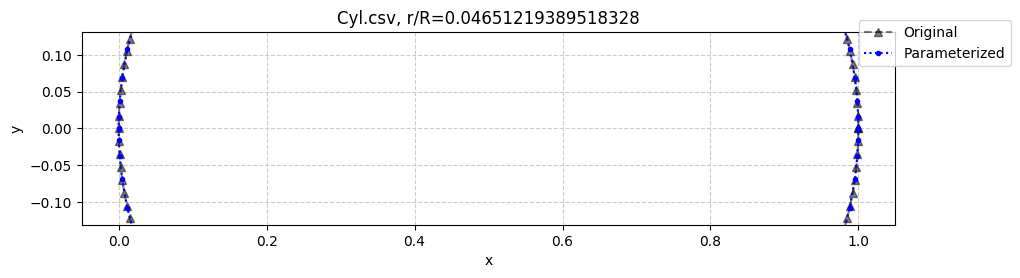

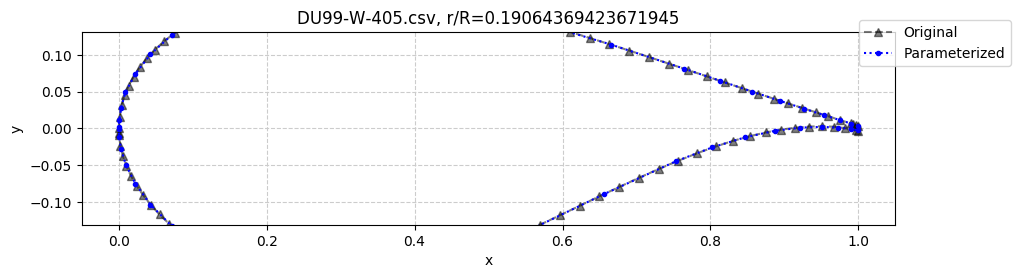

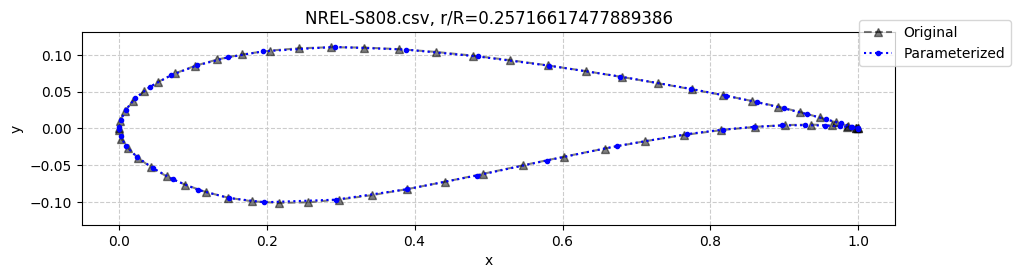

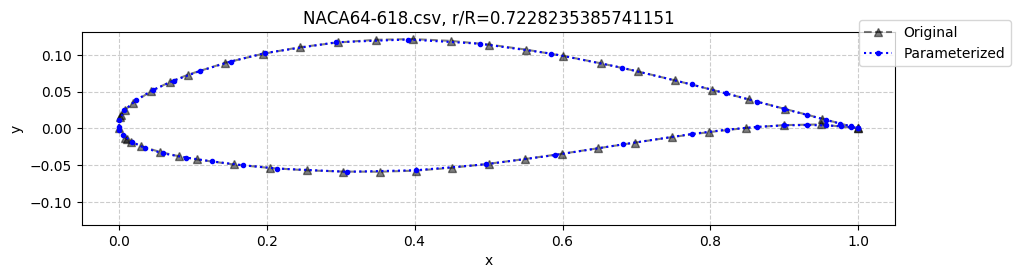

In [4]:
# Rediscretizes the airfoil sections for a uniform discretization
# between sections
N = 2                     # Resolution level
NDIVS = [                 # Discretization sections
          (0.20, 4*N, 5.0, false),
          (0.50, 3*N, 1.0, false),
          (0.20, 4*N, 1/5, false),
        ]

rfl_s = 0.00001             # Airfoil parameterization smoothing 
rfl_k = 4                   # Airfoil parameterization order

# ----------------- AIRFOIL PARAMETERIZATION ---------------------------------
done = []
for i in 1:size(data_airfoil,1)
    
    file_name = String(data_airfoil[2][i])
    
    if file_name in done
        nothing
        
    else    
        # Reads the original airfoil geometry 
        org_x, org_y = gt.readcontour(file_name; header_len=1, delim=",",
                                        path=joinpath(data_path, "airfoils"))

        # Separate upper and lower sides to make the contour injective in x
        upper, lower = gt.splitcontour(org_x, org_y)

        # Parameterize both sides independently
        fun_upper = gt.parameterize(upper[1], upper[2], zeros(upper[1]); inj_var=1,
                                                            s=rfl_s, kspl=rfl_k)
        fun_lower = gt.parameterize(lower[1], lower[2], zeros(lower[1]); inj_var=1,
                                                            s=rfl_s, kspl=rfl_k)

        # Discretizes both sides
        new_upper = gt.multidiscretize(fun_upper, 0, 1, NDIVS)
        new_lower = gt.multidiscretize(fun_lower, 0, 1, NDIVS)

        # Merges sides back together
        points = vcat(reverse(new_upper), new_lower)

        # Saves new contours into data path
        f = open(joinpath(data_path, "airfoils/$(blade_name)_$file_name"), "w")
        print(f, "x/c,y/c\n")
        for (x,y) in points
            print(f, x, ",", y, "\n")
        end
        close(f)

        # Plots
        new_x = [p[1] for p in points]
        new_y = [p[2] for p in points]

        title_str = "$file_name, r/R=$(data_airfoil[1][i])"
        gt.plot_airfoil(org_x, org_y; title_str=title_str, label="Original", 
                                        style="--^k", zoom_factor=1, alpha=0.5)
        gt.plot_airfoil(new_x, new_y; title_str=title_str, label="Parameterized", 
                                        style=":.b", zoom_factor=1)
        
        push!(done, file_name)
    end
end

# Blade Model

<img src="vid/blade00.gif" alt="Vid here" style="width: 800px;"/>

The following method reads all the data files shown in the previous section, and generates a lofted geometry from the data.

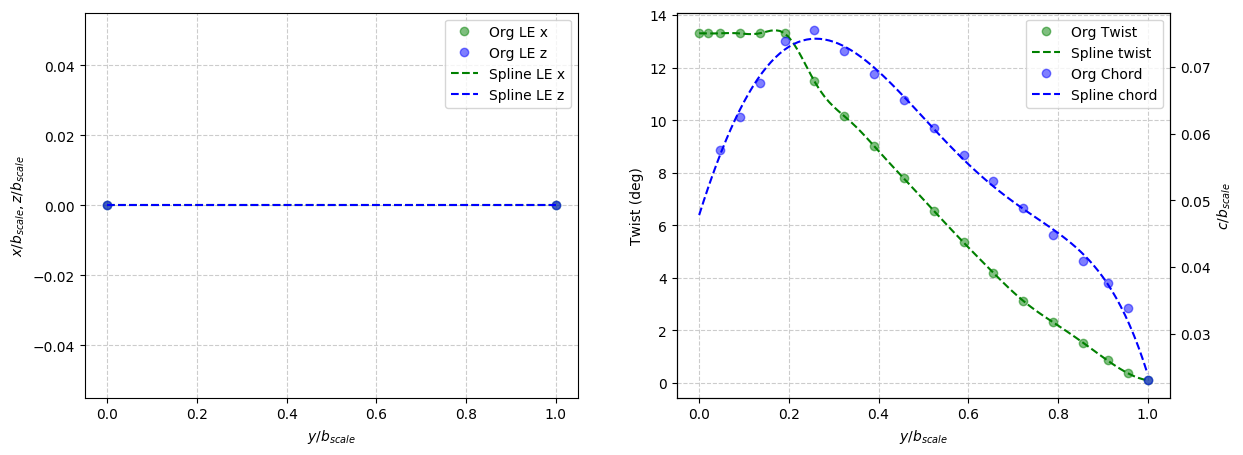

In [14]:
# ------------ BLADE PARAMETERS -----------------------------------------
blade_name = "NREL5MW"          # Blade identifier
# Rtip = 25.0                  # (m) blade radius
# Rhub = 1.0                   # (m) hub radius
Rtip = 1.0              # Here I'm setting the radius to unity for a normalized geometry                 
Rhub = Rtip/20                   
r_NDIVS = 100                # Number of cells along blade


blade_grid = wfv.generate_blade(Rtip, 0.0, r_NDIVS, blade_name; 
                    data_path=data_path, save_path=save_path);

# Saves the gridded geometry as a jld
JLD.save(joinpath(data_path, "$blade_name.jld"), "blade_grid", blade_grid)

# Hub Model

<img src="vid/hub00.gif" alt="Vid here" style="width: 800px;"/>

Here I define the contour of revolution of the hub:

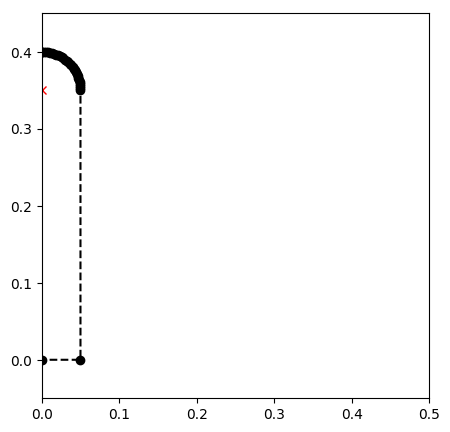

(-0.05, 0.45)

In [6]:
Rhub = Rhub                 # (m) radius of hub
Thub = 8*Rhub               # (m) thickness of hub
Rfillet = Rhub              # (m) Fillet radius
Nfillet = 30                # Points along fillet
Cfillet = [Rhub, Thub]-Rfillet      # Center of fillet

points_fillet = [Cfillet + Rfillet*[sin(a), cos(a)] 
                        for a in linspace(0,pi/2,Nfillet)]

points = vcat(
              [[0, Thub]],
              points_fillet,
              [[Rhub, 0],
              [0, 0],]
             )

x = [p[1] for p in points]
y = [p[2] for p in points]

figure(figsize=(5,5))
plot(x,y, "--ok")
plot([Cfillet[1]], [Cfillet[2]], "xr")
xlim([0, Thub*1.25])
ylim([-Thub*0.125, Thub*1.125])

Now we generate the body of revolution:

In [16]:
paraview = true
file_name = "hub"

# First coordinate is a map to the points in the countor of revolution
# Seciond coordinate is the angle of revolution
# Third is a dummy
NDIVS = [size(points,1), 36*6, 0]   # Divisions in every coordinate
P_min = [0, 0, 0]                   # Lower boundaries 
P_max = [1, 360, 0 ]                # Upper boundaries
loop_dim = 1                        # Loops the countour of revolution

hub_grid = gt.Grid(P_min, P_max, NDIVS, loop_dim)

# Space transformation function
function my_space_transform(X, ind)
    p_ind = ind[1]                  # Point index
    angle = X[2]                    # (deg) angle
    
    # Places the contour in the ZX-plane
    point = [points[p_ind][1], 0, points[p_ind][2]]
    
    # Rotates the contour around the Z-axis        
    return gt.axis_rotation(Float64[0,0,1], Float64(angle))*point
end

# Applies the space transformation to the parametric grid
gt.transform3!(hub_grid, my_space_transform)

# Splits the quadrialateral panels into triangles
dimsplit = 2              # Dimension along which to split
hub_grid = gt.GridTriangleSurface(hub_grid, dimsplit)

# Saves the gridded geometry as a jld
JLD.save(joinpath(data_path, "$file_name.jld"), "hub_grid", hub_grid, 
                                        "Rhub", Rhub, "Thub", Thub)

if save_path!=nothing
  # Outputs a vtk file
  gt.save(hub_grid, file_name; path=save_path)

  if paraview
    # Calls paraview
    run(`paraview --data=$save_path$file_name.vtk`)
  end
end

# Tower Model

<img src="vid/tower00.gif" alt="Vid here" style="width: 800px;"/>

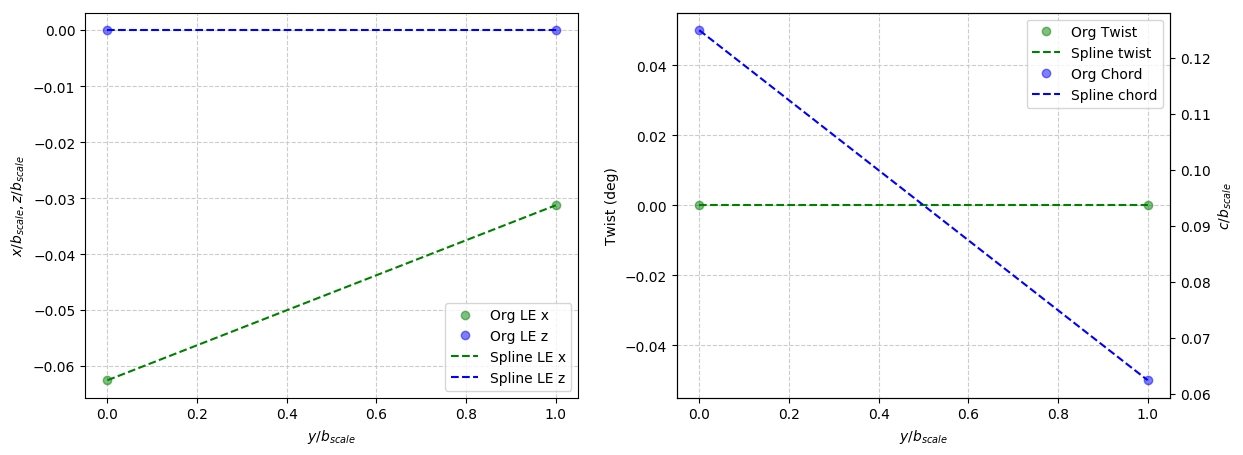

In [17]:
file_name = "tower1"

# ------------ GEOMETRY -------------------------------------------
# h = 2*Rtip            # (m) height
h = 1                  # Unitary height for a normalized geometry
# h = 2             
h_NDIVS = 1            # Number of cells from top to bottom
c_NDIVS = 180          # Number of cells around the cross section

c_bot = Rtip/8/h        # Chord at bottom cross section
c_top = c_bot/2        # Chord at top cross section

# Circular cross section
cyl(a) = [cos(a)+1, sin(a)]/2
circular = [cyl(a)[i] for a in linspace(0, 2*pi, c_NDIVS), i in 1:2]

# Chord distribution
chords = [0.0 c_bot;
          1.0 c_top]

# Twist distribution
twists = [0.0 0;
         1.0 0]

# Leading edge position
LE_x = [0.0 -c_bot/2;
        1.0 -c_top/2]

LE_z = [0.0 0;
        1.0 0]

# Cross sections
crosssections = [(0.0, circular), 
                 (1.0, circular)]

# ------------ LOFTED GEOMETRY -------------------------------------------
tower_grid = wfv.generate_loft(h, 0, 1, h_NDIVS, 
                            chords, twists, LE_x, LE_z, crosssections;
                            save_path=save_path, paraview=true,
                            file_name=file_name
                           ) 

# Saves the gridded geometry as a jld
JLD.save(joinpath(data_path, "$file_name.jld"), "tower_grid", tower_grid, "h", h)

# Wind Turbine Model

<img src="vid/turbine00.gif" alt="Vid here" style="width: 800px;"/>

In [18]:
this_Rtip = 126.0/2
this_h = 120.0

windturbine = wfv.generate_windturbine(this_Rtip, this_h, "NREL5MW", "hub", "tower1"; 
                                                    save_path=save_path, nblades=3);

# Wind Farm Layout

<img src="img/farm00.png" alt="Pic here" style="width: 800px;"/>

In [19]:
this_save_path = joinpath(save_path, "windfarm00")
gt.create_path(this_save_path, false)

turbine_x = [  909.98349606,  1005.0174903 ,   900.40238835,  -479.57607866,
                 937.92551703,   461.20472344,   123.06165965, -1073.3529325 ,
                -698.76200523, -1083.53094471,  1365.9338773 ,   204.10557045,
                 306.99725222,  -585.35767689,    10.9706543 ,   543.54927959,
                 -20.50212678, -1313.07762466, -1327.00852816,   137.06316521,
                1378.99410072,  -645.66250771,  -535.7876181 ,  -100.66538419,
               -1331.29278587]

turbine_y = [  500.59889721,  -974.65186327,    76.51586507,  1315.29789208,
                1039.37304649, -1321.85187113,  -300.57817461,  -765.82650713,
               -1213.14956771,   886.54973742,  -306.96866239,   194.51410928,
                 735.69027357,    81.95252777,  -892.14222889,  -930.41798152,
                 970.9117144 ,   398.75277565,    -3.52236011,  1393.27798468,
                 241.61586052,  -791.92492366,   919.26560593, -1396.37638078,
                -433.19849727]
turbine_z = [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
                0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]

hub_height = [ 100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
                100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
                100.,  100.,  100.,  100.,  100.,  100.,  100.]

rotor_diameter = [ 100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
                100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
                100.,  100.,  100.,  100.,  100.,  100.,  100.]

nBlades = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
               3, 3]

wind_direction = 228.0

yaw = [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.] - wind_direction

wfv.generate_layout(rotor_diameter, hub_height, nBlades,
                                turbine_x, turbine_y, turbine_z,
                                yaw; save_path=this_save_path);

# Perimeter

<img src="img/perimeter00.png" alt="Pic here" style="width: 800px;"/>

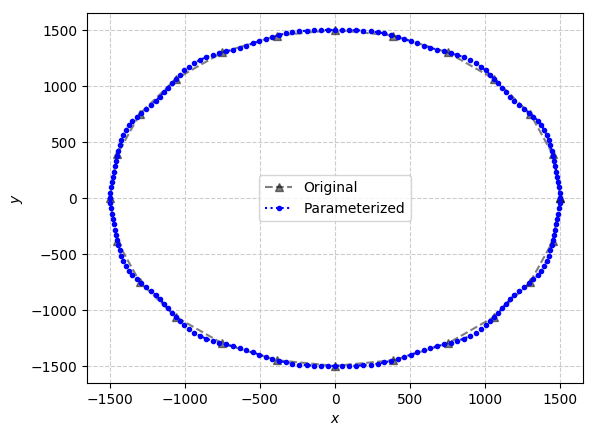

In [11]:
NDIVSx = 100            # Cells in the parametric x-direction
NDIVSy = 100            # Cells in the parametric y-direction
NDIVSz = 0              # Cells in the geometric z-direction

perimeter_points = [
       [  1.50000000e+03,   0.00000000e+00,   0.00000000e+00],
       [  1.44888874e+03,   3.88228568e+02,   0.00000000e+00],
       [  1.29903811e+03,   7.50000000e+02,   0.00000000e+00],
       [  1.06066017e+03,   1.06066017e+03,   0.00000000e+00],
       [  7.50000000e+02,   1.29903811e+03,   0.00000000e+00],
       [  3.88228568e+02,   1.44888874e+03,   0.00000000e+00],
       [  9.18485099e-14,   1.50000000e+03,   0.00000000e+00],
       [ -3.88228568e+02,   1.44888874e+03,   0.00000000e+00],
       [ -7.50000000e+02,   1.29903811e+03,   0.00000000e+00],
       [ -1.06066017e+03,   1.06066017e+03,   0.00000000e+00],
       [ -1.29903811e+03,   7.50000000e+02,   0.00000000e+00],
       [ -1.44888874e+03,   3.88228568e+02,   0.00000000e+00],
       [ -1.50000000e+03,   1.83697020e-13,   0.00000000e+00],
       [ -1.44888874e+03,  -3.88228568e+02,   0.00000000e+00],
       [ -1.29903811e+03,  -7.50000000e+02,   0.00000000e+00],
       [ -1.06066017e+03,  -1.06066017e+03,   0.00000000e+00],
       [ -7.50000000e+02,  -1.29903811e+03,   0.00000000e+00],
       [ -3.88228568e+02,  -1.44888874e+03,   0.00000000e+00],
       [ -2.75545530e-13,  -1.50000000e+03,   0.00000000e+00],
       [  3.88228568e+02,  -1.44888874e+03,   0.00000000e+00],
       [  7.50000000e+02,  -1.29903811e+03,   0.00000000e+00],
       [  1.06066017e+03,  -1.06066017e+03,   0.00000000e+00],
       [  1.29903811e+03,  -7.50000000e+02,   0.00000000e+00],
       [  1.44888874e+03,  -3.88228568e+02,   0.00000000e+00],
       [  1.50000000e+03,  -3.67394040e-13,   0.00000000e+00]
    ]


wfv.generate_perimetergrid(perimeter_points, NDIVSx, NDIVSy, NDIVSz; save_path=save_path);

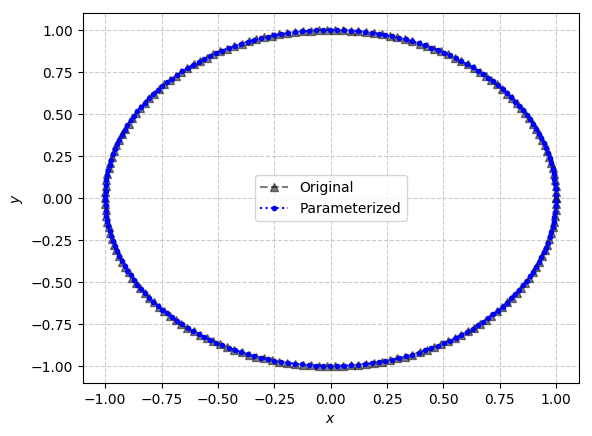

In [12]:
NDIVSx = 100
NDIVSy = 100
NDIVSz = 0

perimeter_points = [ [cos(a), sin(a), 0] for a in linspace(0, 2*pi, 179)]

wfv.generate_perimetergrid(perimeter_points, NDIVSx, NDIVSy, NDIVSz; save_path=save_path);

# Fluid Domain

<img src="img/fdom00.png" alt="Pic here" style="width: 800px;"/>

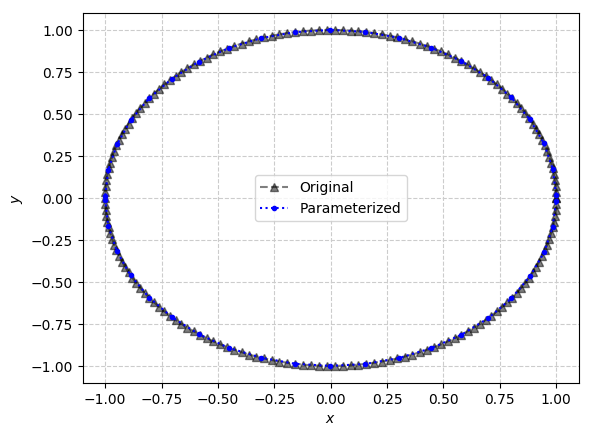

In [20]:
NDIVSx = 20              # Cells in the parametric x-direction
NDIVSy = 20              # Cells in the parametric y-direction
NDIVSz = 20              # Cells in the geometric z-direction

z_min = 0.0              # Lower bound of z-direction
z_max = 1.0              # Upper bound of z-direction

perimeter_points = [ [cos(a), sin(a), 0] for a in linspace(0, 2*pi, 179)]

fdom_grid = wfv.generate_perimetergrid(perimeter_points, NDIVSx, NDIVSy, NDIVSz; 
                                        z_min=z_min, z_max=z_max, save_path=save_path);

# Complete Visualization

<img src="img/farm02.png" alt="Pic here" style="width: 800px;"/>
<img src="img/farm03.png" alt="Pic here" style="width: 800px;"/>

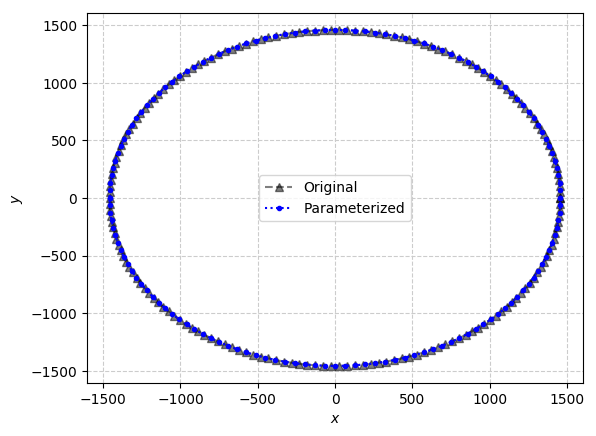

In [28]:
include("../src/WFVisual.jl")
wfv = WFVisual

this_save_path = joinpath(save_path, "windfarm01")
gt.create_path(this_save_path, false)


# --------------------- WIND FARM LAYOUT ---------------------------------------------
turbine_x = [  909.98349606,  1005.0174903 ,   900.40238835,  -479.57607866,
                 937.92551703,   461.20472344,   123.06165965, -1073.3529325 ,
                -698.76200523, -1083.53094471,  1365.9338773 ,   204.10557045,
                 306.99725222,  -585.35767689,    10.9706543 ,   543.54927959,
                 -20.50212678, -1313.07762466, -1327.00852816,   137.06316521,
                1378.99410072,  -645.66250771,  -535.7876181 ,  -100.66538419,
               -1331.29278587]

turbine_y = [  500.59889721,  -974.65186327,    76.51586507,  1315.29789208,
                1039.37304649, -1321.85187113,  -300.57817461,  -765.82650713,
               -1213.14956771,   886.54973742,  -306.96866239,   194.51410928,
                 735.69027357,    81.95252777,  -892.14222889,  -930.41798152,
                 970.9117144 ,   398.75277565,    -3.52236011,  1393.27798468,
                 241.61586052,  -791.92492366,   919.26560593, -1396.37638078,
                -433.19849727]
turbine_z = [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
                0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]

hub_height = [ 100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
                100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
                100.,  100.,  100.,  100.,  100.,  100.,  100.]

rotor_diameter = [ 100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
                100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
                100.,  100.,  100.,  100.,  100.,  100.,  100.]

nBlades = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
               3, 3]

wind_direction = 228.0

yaw = [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.] - wind_direction


# --------------------- PERIMETER AND FLUID DOMAIN --------------------------------------------

NDIVSx = 70              # Cells in the parametric x-direction
NDIVSy = 70              # Cells in the parametric y-direction
NDIVSz = 70              # Cells in the geometric z-direction

# Dummy perimeter
Rper = norm(maximum.([turbine_x, turbine_y]) - minimum.([turbine_x, turbine_y]))/2*3/4
perimeter_points = Rper*[ [cos(a), sin(a), 0] for a in linspace(0, 2*pi, 179)]

# Dummy wake function
wake(X) = 1.0*[cos(wind_direction*pi/180), sin(wind_direction*pi/180), 0]


# --------------------- GENERATE WIND FARM ----------------------------------------------------

wfv.generate_windfarm(rotor_diameter, hub_height, nBlades,
                                turbine_x, turbine_y, turbine_z,
                                yaw,
                                perimeter_points, wake; 
                                NDIVSx=NDIVSx, NDIVSy=NDIVSy, NDIVSz=NDIVSz, 
                                save_path=this_save_path);

# New heading